<p><a name="sections"></a></p>


# Sections

- <a href="#numpy">Numpy Overview</a><br>
- <a href="#array">Ndarray</a><br>
    - <a href="#dtype">Data Type</a><br>
    - <a href="#create">Creating Data Array</a><br>
- <a href="#slice">Subscripting and Slicing</a><br>
    - <a href="#shape">Shape</a><br>
    - <a href="#operations">Operations</a><br>
     - <a href="#matrix">Matrix and Linear Algebra</a><br>
- <a href="#scipy">Scipy Overview</a><br>
- <a href="#statistic">Statistical Functions</a><br>
- <a href="#hypothesis">Hypothesis Test</a><br>
- <a href="#sample">Random Sampling</a><br>
    - <a href="#birthday">Random Sampling: Birthday Problems</a><br>
- <a href="#distribution">Distribution</a><br>
    - <a href="#binomial">Binomial Distribution</a><br>
    - <a href="#bino_object">The Binomial Distribution Object</a><br>
    - <a href="#normal">Normal Distribution</a><br>
    - <a href="#norm_object">The Normal Distribution Object</a><br>



<p><a name="numpy"></a></p>
## NumPy Overview

NumPy is the fundamental package for scientific computing with Python. 

- Primitive data types are often collected and arranged in certain ways to facilitate analysis. A common example are **vectors** and **matrices** in linear algebra. Numpy provide easy tools to achieve it. 
- Numpy provides many functions and modules for scientific uses, such as linear algebra operations, random number generation, Fourier transform, etc.

For full documentation, go to:  http://docs.scipy.org/doc/.

As a module, you need to import it to make the functions it has accessible. You can do it by run the following code:

In [1]:
import numpy as np

Whenever you need to call a function from Numpy, say `matrix()`, you could run:
```
np.matrix( arguments )
```

<p><a name="array"></a></p>
## Ndarray

<p><a name="dtype"></a></p>
### Data Type
NumPy provides an N-dimensional array type, the `ndarray`. It can be described as a collection of elements of the same data type. We will discuss more about the creation of ndarray, but for the illustrating purpose, let’s construct a simple example with the function `array()`.

In [2]:
my_ary=np.array([1,2,3])

We see that `array()` takes a list as an argument. Then `my_ary` is a ndarray with three elements ordered exactly the same as the list inputted.

In [3]:
print type(my_ary)
print my_ary

<type 'numpy.ndarray'>
[1 2 3]


As you might suspect, each element in `my_ary` can be accessed by integer index. Details of indexing will be provided later.

In [4]:
print my_ary[0]  # In Python, first index is 0
print my_ary[1]

1
2


The type ndarray is flexible because it supports great variety of primitive data types:
- http://docs.scipy.org/doc/numpy/user/basics.types.html

subject to the **homogeneity condition**, which means every element in ndarray have the same type. The type of the elements can be accessed as an attribute of an ndarray.

In [5]:
my_ary.dtype

dtype('int64')

When the elements are of string types, it print the dtype automatically. The letter `‘S’ ` stands for string and the number followed represents the largest number of letters among all the elements. 

In [6]:
np.array(['a', 'ab'])

array(['a', 'ab'], 
      dtype='|S2')

If the list inputted to the function `array()` is of mixed types, Numpy (upcast) cast all elements to a common (superclass) class:

In [7]:
print np.array([1.0, 2, 3])
print np.array(['a', 2, 3])

[ 1.  2.  3.]
['a' '2' '3']


<p><a name="create"></a></p>
### Creating Data Array

We have already seen a way to generate ndarray by plugging a list into the function `array()`. This method can be actually generalized to create multidimensional array by plugging nested list instead of simple list into the `array()` function.

In [8]:
simple_lst = [1,2]
nested_lst = [[1,2], [3,4]]
multi_ary = np.array(nested_lst)
multi_ary

array([[1, 2],
       [3, 4]])

Recall that nested list is a list having lists as elements. In this particular case, multidimensional ndarray is designed to mimic mathematical matrices, so each inner list in `nest_lst` is like a row in a matrix.

We can go one step further by plugging a list of multidimensional arrays into `array()`. This results in even higher dimension of an array. We will only do creating (here) and indexing for them. Most emphasis are put on the one and two dimensional arrays.

In [9]:
nested_lst2 = [[5,6], [7,8]]
multi_ary2 = np.array(nested_lst2)
higher_dim = np.array([multi_ary, multi_ary2])
higher_dim

array([[[1, 2],
        [3, 4]],

       [[5, 6],
        [7, 8]]])

So far we have been creating arrays mainly by specifying every element. When creating larger arrays this is not practical. Numpy provides functions which create functions by certain **rules**. We discuss some of them below.

- The simplest way to create a Numpy array is by the function `arange()`.

In [10]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Plugging float into `arange()` result in array upto the greatest number smaller than the float.

In [11]:
np.arange(9.5)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

We don’t have to always start from 0. The first argument below indicates the array starts from 2 and the second argument indicates it stops at 9 (10-1).

In [12]:
np.arange(2, 10)

array([2, 3, 4, 5, 6, 7, 8, 9])

And step between terms doesn’t need to be 1. Below we specify the step to be 3 as the third argument, therefore 2 + 3 = 5, then 5 + 3 = 8. Since the next one 8 + 3 = 11, which is greater than the upper bound 9, so it stops at 8.

In [13]:
np.arange(2,10,3)

array([2, 5, 8])

A very similar method is linspace(). It takes the start (first argument), the end (second argument) and  the desired length (last argument).

In [14]:
np.linspace(0,10, 51)

array([  0. ,   0.2,   0.4,   0.6,   0.8,   1. ,   1.2,   1.4,   1.6,
         1.8,   2. ,   2.2,   2.4,   2.6,   2.8,   3. ,   3.2,   3.4,
         3.6,   3.8,   4. ,   4.2,   4.4,   4.6,   4.8,   5. ,   5.2,
         5.4,   5.6,   5.8,   6. ,   6.2,   6.4,   6.6,   6.8,   7. ,
         7.2,   7.4,   7.6,   7.8,   8. ,   8.2,   8.4,   8.6,   8.8,
         9. ,   9.2,   9.4,   9.6,   9.8,  10. ])

Without the last argument, the length defaults 50.

**Exercise 1**

Which of the following two arrays has all integer (this refer to the value, not data type) entries? 
- `np.linspace(0, 9, 3)`
- `np.linspace(0, 9, 4)`

As `array()`, we can change the datatype by specifying dtype. Run the following code, what do you find?

- `np.linspace(0, 9, 4, dtype ='Int64')`
- `np.linspace(0, 9, 3, dtype ='Int64')`

In [15]:
### Your code here
print np.linspace(0, 9, 3)
print np.linspace(0, 9, 4)
print np.linspace(0, 9, 3, dtype='Int64')
print np.linspace(0, 9, 4, dtype='Int64')

[ 0.   4.5  9. ]
[ 0.  3.  6.  9.]
[0 4 9]
[0 3 6 9]


**Regular Creating**

We might want to construct a constant array. The function `ones()` returns an array with as many 1 as the number plugged in.

In [16]:
np.ones(3)

array([ 1.,  1.,  1.])

We can construct all the constant array by multiply the desired constant to a array produced as above. The details of array operation will be discussed, but multiplying a number to an array results in every entry in the array multiplied by the constant.

In [17]:
import math
math.pi *np.ones(5)

array([ 3.14159265,  3.14159265,  3.14159265,  3.14159265,  3.14159265])

We have seen from above that we can easily generate a zero array by times 0 to a array generated by the function `ones()`. However, Numpy also provides a function `zeros()`, which works in the same way as the function `ones()`:

In [18]:
np.zeros(5)

array([ 0.,  0.,  0.,  0.,  0.])

<p><a name="slice"></a></p>
## Subscripting and Slicing

We often need to access a particular element (subscripting) in our array. We have already seen that ndarray is treated as an ordered sequence, whose entries are indexed by integers. 

In [19]:
x = np.arange(1, 11)
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

We may print out an arbitrary entry. For example, the 3rd element in x:

In [20]:
x[2]  # Python index from 0

3

We may then plug it into a function:

In [21]:
3**(x[2])

27

We may update an element with indexes:

In [22]:
x[2] = 100
x

array([  1,   2, 100,   4,   5,   6,   7,   8,   9,  10])

Negative indexes select the element by the opposite order.

In [23]:
print x[-1]; print x[-2]; print x[-10]
# Notice that it does not start with “-0”, OF COURSE!!

10
9
1


**Exercise 2**

Initialize you x again with:
```
x = np.arange(1, 11)
```
Run `x[2]=3.0`. Which entry of the array x will be updated?
Run `x[2]=3.1`. Which entry of the array x will be updated?
Run `x.astype(float)` to change the type to float, then update the third element to 3.1.

In [24]:
x = np.arange(1, 11)
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
#### Your code here

We often need to subscript in a higher dimensional array. We start by constructing one:

In [28]:
high_x = np.array([[1,2,3],[4,5,6]])
high_x

array([[1, 2, 3],
       [4, 5, 6]])

As we mentioned before, 2-dimensional ndarray can be thought as a nested list. Therefore, to access the number 2, it is the element 1 in the list 0:

In [29]:
high_x[0][1]

2

In this way, we may slice a particular row by selecting an inner list:

In [30]:
high_x[1]

array([4, 5, 6])

A 2-dimensional array can be also taken for a matrix.

\begin{pmatrix}
1 &2  &3 \\ 
4 &5  &6 
\end{pmatrix}

Therefore as matrices, a 2-dimensional array can be indexed a pair of integers -- row indexes and columns indexes. Conventionally, the first index is for row, the second for column.


In [31]:
print high_x[0,0]; print high_x[0,1]; print high_x[0,2]
print high_x[1,0]; print high_x[1,1]; print high_x[1,2]

1
2
3
4
5
6


We may then slice part of the second row by specifying the row index and the range of the columns.

In [32]:
high_x[1,0:2]

array([4, 5])

When specifying index to be from the first entry, we can leave it blank.

In [33]:
high_x[1,:2]

array([4, 5])

<p><a name="shape"></a></p>
### Shape

Again as a matrix, the shape of an array can be denoted by the number of rows and columns it has. And again, first rows and then columns. For example, consider  the following is a 2 by 3 matrix.

\begin{pmatrix}
1 &2  &3 \\ 
4 &5  &6 
\end{pmatrix}

For an array, the shape (or dimension in more matrix convention) can be seen by calling the `.shape` attribute.

In [34]:
high_x.shape

(2, 3)

Now we understand the notation of the shape. We may discuss the regular creation of 2-dimensional arrays. We start with generating a constant matrix by the functions `ones()`.

In [35]:
np.ones([2,3])

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

The function `zero()` works in the same way:

In [36]:
np.zeros([3,2])

array([[ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.]])

We may also rearrange the shape of a 1-dimensional array to obtain a higher dimensional one. This can be done by a method `reshape()`:

In [37]:
x = np.arange(8)
x.reshape([2,4])

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

This can also be achieved by assigning the desired value to the attribute `.shape`

In [38]:
x = np.arange(8)
x.shape = (2,4)
x

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

The method `reshape()` actually allows two different ordering. The one we see from the previous page fill up row by row. This is specified by the default value of the keyword parameter  `order='C'`:

In [39]:
x = np.arange(8)
x.reshape([2,4], order='C')

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

We may instead use `order='F'`, so the matrix be filled up column by column.

In [40]:
x = np.arange(8)
x.reshape([2,4], order='F')

array([[0, 2, 4, 6],
       [1, 3, 5, 7]])

All the creation method we talked about can be of course generalized to even higher dimension, here is an example:

In [41]:
np.ones([2,3,4])

array([[[ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.]],

       [[ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.]]])

**Exercise 3**

- Create a 4 by 5 five matrix with all the  entries 8.
- Create an array corresponding to the matrix below:
\begin{pmatrix}
9 &8  &7 \\ 
6 &5  &4 
\end{pmatrix}

In [ ]:
#### Your code here

<p><a name="operations"></a></p>
### Operations

**Arithmetic Operations**

We often want to do math on an array. Addition of more than one array and scalar multiplication works as we expect: 

In [44]:
x = np.array([1,2])
y = np.array([3,4])
z = np.array([5,6])
x + y + z

array([ 9, 12])

In [45]:
5*x

array([ 5, 10])

Addition is actually an example of **pointwise operations**. Here is another example:

In [46]:
y*z       # Same rule applies to multiplication

array([15, 24])

All the arithmetic operators can work pointwisely

In [47]:
x**y

array([ 1, 16])

In [48]:
y/x 

array([3, 2])

In [49]:
y-x

array([2, 2])

In [50]:
z%y 

array([2, 2])

On the other hand, scalar product is an special case of **broadcasting**:

In [51]:
x+3 

array([4, 5])

All the arithmetic operators can be broadcasted similarly

In [52]:
x**2

array([1, 4])

In [53]:
x/2

array([0, 1])

In [54]:
y-3

array([0, 1])

In [55]:
z%3   

array([2, 0])

**Comparison Operations**

Comparison operators generates Boolean arrays. As arithmetic operators, they also follow the broadcasting rule.

In [56]:
x>1

array([False,  True], dtype=bool)

All the comparison operators can be broadcasted similarly.

In [57]:
x<1

array([False, False], dtype=bool)

In [58]:
y<=3

array([ True, False], dtype=bool)

In [59]:
z>=6

array([False,  True], dtype=bool)

In [60]:
z==5

array([ True, False], dtype=bool)

Comparison operators can be applied pointwisely to multiple arrays. This is different from **lists**.

In [61]:
x>y

array([False, False], dtype=bool)

All the operators operators can be broadcasted similarly.

In [62]:
x < y

array([ True,  True], dtype=bool)

In [63]:
y<=z

array([ True,  True], dtype=bool)

In [64]:
z>=x

array([ True,  True], dtype=bool)

In [65]:
z==x

array([False, False], dtype=bool)

**Combining and Aggregating Boolean Array**

In many cases we want to combine arrays with `and` or `or` componentwise.

In [66]:
b_1 = np.array([True, True, True])
b_2 = np.array([True, True, False])
b_3 = np.array([True, False, False])
b_4 = np.array([False, False, False])

In [67]:
print np.logical_or(b_2, b_3)
print np.logical_and(b_2, b_3)

[ True  True False]
[ True False False]


We also very often wants to aggregate a boolean array:

In [68]:
print b_1.all()
print b_2.all()

True
False


In [69]:
print b_3.any()
print b_4.any()

True
False


**Fancy Indexing**

We often need to filter an array according to some condition. This can be done by two steps.

- Generate Boolean array

In [70]:
x==1

array([ True, False], dtype=bool)

- Slice the array with the Boolean array

In [71]:
x[np.array([ True, False])]

array([1])

The two steps can be actually combined

In [72]:
x[x==1]

array([1])

Fancy indexing can be applied to (higher) 2 dimensional arrays. However, slicing with fancy index drop the structure to the 1 dimensional array.

In [73]:
high_x = np.array([[1,2,3],[4,5,6]])
high_x[high_x>=3]

array([3, 4, 5, 6])

However, assignment with fancy indexing doesn’t change the shape.

In [74]:
high_x[high_x>=3]=10
high_x


array([[ 1,  2, 10],
       [10, 10, 10]])

** Exercise 4**

Run the code below to create arrays.

```
ary_1= np.ones([3,2])
ary_2=np.arange(1,7).reshape(3,2)
```
- Sum up the arrays.
- Add 1 to the first column of `ary_1`, and add 2 to the second column of `ary_1`.
- Update `ary_2`: change any number greater than 4 to 2.5. 


In [75]:
ary_1= np.ones([3,2])
ary_2=np.arange(1,7).reshape(3,2)

In [ ]:
#### Your code here

<p><a name="matrix"></a></p>
### Matrix and Linear Algebra

**Matrix type**

We mentioned that the 2 dimensional arrays can be indexed with matrix convention. Numpy actually provides a function `matrix()` that changes the type ndarray to `numpy.matrixlib.defmatrix.matrix` (we call them matrix for simplicity hereafter).

In [77]:
x = np.matrix([1,2])
type(x)

numpy.matrixlib.defmatrix.matrix

**Exercise 5**

We illustrate an important side issue here. First create an array by 
```
ary=np.array([1,2,3,4])
```
- Create two matrices,  
```
m1=np.matrix([1,2,3,4])
```
and 
```
m2=np.mat([1,2,3,4]).
```
These are two different functions generate matrices, but when you print out m1 and m2, do they look different?

- Create the two matrix in different ways, m1=np.matrix(ary) and m2=np.mat(ary). Print them out again, do you see any difference?

- Now, execute ary[1]=0. Now print out m1 and m2 again, are they still the same?

Remark: This illustrate a common issue when making a copy (m2 is a transformation of a copy of ary). We often thought we create a new object by copying but in fact they are often just two different names of one object. Changing one of them changes the other.

In [ ]:
#### Your code here

Once an array is converted to a matrix, it is taken for a **2-dimensional object**. The difference lies in the fact that, we can access the second entry of an array by:

In [81]:
y=np.array([3,4])
y[1]

4

However, if we change y into a matrix, it no longer works:

In [82]:
y = np.matrix(y)
y[1]

IndexError: index 1 is out of bounds for axis 0 with size 1

Since `y` is now taken for 2-dimensional (Notice the extra bracket):

In [83]:
y

matrix([[3, 4]])

The expression `y[1]` now indicates the second row of `y`, which it does not have. To access the element 4, we need to select the second element in the first row by:

In [84]:
y[0, 1]

4

Multiple inner lists are considered multiple rows:

In [85]:
z = np.matrix([[3],[4]])
z

matrix([[3],
        [4]])

**Matrix Multiplication**

Another important difference between arrays and matrices is the multiplication. While the comparison and the other arithmetic operations still works pointwisely, multiplication (and therefore raising power) does not. Run the code below and look at the error message.

In [86]:
x*y

ValueError: shapes (1,2) and (1,2) not aligned: 2 (dim 1) != 1 (dim 0)

The type matrix is for linear algebra, in which the matrix multiplication is always **“a row times a column”**:

$$
(1,2,3) \times \left(
\begin{array}{c}
1\\
2\\
3\\
\end{array}
\right)
= (1+4+9) = 14
$$

Both our `x` and `y` transformed from ndarray into matrix type, which is taken for a row vector (matrix with 1 row, if you want). To change the later to a column vector (matrix with 1 column), we may use the method `.T`. 

In [87]:
y

matrix([[3, 4]])

In [88]:
y.T

matrix([[3],
        [4]])

Then we may do the multiplication:

In [89]:
x*y.T

matrix([[11]])

**Identity**

An important special matrix is called **identity**. An identity is a square matrix (the number of the rows and the columns are the same), all of whose entries are 0, except the diagonal entries are 1. A identity array can be created by specifying the dimension in the function `eye()`:

In [90]:
np.eye(3)

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

We then change it into a matrix type

In [91]:
Id = np.matrix(np.eye(3))

The importance of the identity matrix lies on the fact any matrix multiply by the identity matrix (with the dimension so that a multiplication is applicable) remains unchanged.

In [92]:
my_mat = np.matrix(range(9))
my_mat = my_mat.reshape([3,3])
my_mat

matrix([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

In [93]:
Id*my_mat

matrix([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.]])

Actually, the identity matrix  we created above can be applied to more than just 3 by 3 matrices. Whenever the dimension match: 

In [94]:
my_vec1 = (np.matrix(range(3))).reshape([3,1])
Id*my_vec1

matrix([[ 0.],
        [ 1.],
        [ 2.]])

In [95]:
my_vec2 = (np.matrix(range(3))).reshape([1,3])
my_vec2*Id

matrix([[ 0.,  1.,  2.]])

**Inverse**

Identity matrix is analogous to 1 in real number, any number times 1 remains unchanged. A nonzero real number has a reciprocal, the analogy for a matrix is called an inverse. For example,

In [96]:
m1 = np.matrix([[1,2],[0,1]])
m1

matrix([[1, 2],
        [0, 1]])

In [97]:
m2 = np.matrix([[1,-2],[0,1]])
m2

matrix([[ 1, -2],
        [ 0,  1]])

If we compute the product of m1 and m2 (in both orders), we get:

In [98]:
print m1*m2
print '\n'
print m2*m1

[[1 0]
 [0 1]]


[[1 0]
 [0 1]]


We remark that if a matrix have an inverse, it has the unique inverse. Therefore, for the example above one can say the inverse of `m1` (`m2`) is `m2` (`m1`).

For a `Numpy` matrix (with an inverse), there is a method returning the inverse matrix:

In [99]:
print m1
print '\n'
print m1.I

[[1 2]
 [0 1]]


[[ 1. -2.]
 [ 0.  1.]]


In [100]:
print m2
print '\n'
print m2.I

[[ 1 -2]
 [ 0  1]]


[[ 1.  2.]
 [ 0.  1.]]


**Exercise 6**

- How do you find a tuple of `x`, `y` and `z` satisfying all the equations below?

$$
\begin{eqnarray}
3x +2y -z &= 1\\
2x -2y +4z &=-2\\
-x +\frac{1}{2}y- z&= 0
\end{eqnarray}
$$

Observe that the equation can be written as:

$$
\begin{pmatrix}
3 &2  &-1 \\ 
2 &-2  &4 \\
-1&\frac{1}{2}&-1
\end{pmatrix}
\times
\begin{pmatrix}
x\\y\\z
\end{pmatrix}
=
\begin{pmatrix}
1\\-2\\0
\end{pmatrix}
$$

From here, can we use **inverse** to solve for x, y and z?

In [ ]:
#### Your code here

<p><a name="scipy"></a></p>
## Scipy Overview

SciPy is a package for scientific computing and technical computing with Python. 
- SciPy builds on the NumPy array object and is part of the NumPy stack which includes tools like Matplotlib and pandas.
- SciPy contains modules for stats (which we will focus on), integration, optimize, linear algebra, interpolation, special functions, FFT, signal, image processing, ODE solvers and more.
- For full documentation, go to:  http://docs.scipy.org/doc/.

**Sample data set**

Before we begin the class in SciPy, we import the modules we need for demonstration. We import datasets from “sklearn” module simply because we need the sample data set -- iris.

In [102]:
import numpy as np
from scipy import stats

from sklearn import datasets
iris_raw = datasets.load_iris()

The stats module contains variety of tools for statistical task, we will demonstrate the topic below:
 - Statistical functions.
 - Hypothesis test.
 - Random Sampling.
You are invited to run the code below to see a list of functions stats provides.

In [103]:
import scipy
scipy.info(stats)

Statistical functions (:mod:`scipy.stats`)

.. module:: scipy.stats

This module contains a large number of probability distributions as
well as a growing library of statistical functions.

Each univariate distribution is an instance of a subclass of `rv_continuous`
(`rv_discrete` for discrete distributions):

.. autosummary::
   :toctree: generated/

   rv_continuous
   rv_discrete

Continuous distributions

.. autosummary::
   :toctree: generated/

   alpha             -- Alpha
   anglit            -- Anglit
   arcsine           -- Arcsine
   beta              -- Beta
   betaprime         -- Beta Prime
   bradford          -- Bradford
   burr              -- Burr
   cauchy            -- Cauchy
   chi               -- Chi
   chi2              -- Chi-squared
   cosine            -- Cosine
   dgamma            -- Double Gamma
   dweibull          -- Double Weibull
   erlang            -- Erlang
   expon             -- Exponential
   exponnorm         -- Exponentially Modified Normal
   

The package sklearn (its real name is scikit-learn) is for machine learning. it contains a popular sample data set, iris, to demonstrate classification problem, which takes some known feature into account then predict the class each instance belongs to. In the iris data set, the know features are the length and the width of the petals, and the length and the width of the sepals. With those information, functions in sklearn can be used to predict the species of each instance. We will not discuss machine learning today, but we will use the sepal length and the pedal length as our example for numeric features and the species for categorical features. 

In [104]:
iris_raw.keys()

['target_names', 'data', 'target', 'DESCR', 'feature_names']

The features of iris data is recorded in `iris_raw.data` as a 2-dimensional array. There are 150 rows corresponding to 150 instances (flowers), 4 columns corresponds to 4 different features.

In [105]:
iris = iris_raw.data
iris[0:8,:]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2]])

We will use the following three arrays

In [106]:
sepal_len = iris[:,0]
sepal_wid = iris[:,1]
petal_len = iris[:,2]

The labels of iris data is recorded in `iris_raw.target` as an array.We manually picked some entries to illustrate:

In [107]:
iris_raw.target[[0,1,50,51,100,101]]

array([0, 0, 1, 1, 2, 2])

We call the target “species”:

In [108]:
species=iris_raw.target

Though the values are integer, they are actually representing the species, which can be seen from 

In [109]:
iris_raw.target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='|S10')

<p><a name="statistics"></a></p>
### Statistical Functions

We often want a quick descriptive stats when having new data. stats provides function to deal with both categorical and numerical features. The function `itemfreq()`  returns the frequency of each class you have in a categorical feature.

In [110]:
stats.itemfreq(species)

array([[ 0, 50],
       [ 1, 50],
       [ 2, 50]])

Numerical features can be summarized by the function `describe()`:

In [111]:
stats.describe(sepal_len)

DescribeResult(nobs=150, minmax=(4.2999999999999998, 7.9000000000000004), mean=5.8433333333333337, variance=0.68569351230425069, skewness=0.3117530585022963, kurtosis=-0.5735679489249765)

The function returns an special object `scipy.stats.stats.DescribeResult`. To access each of item, we can use either use the item name of integer index:

In [112]:
stats.describe(sepal_len)[0]

150

In [113]:
stats.describe(sepal_len).minmax

(4.2999999999999998, 7.9000000000000004)

More on statistical functions can be found in the link.
- http://docs.scipy.org/doc/scipy/reference/stats.html

<p><a name="hypothesis"></a></p>
### Hypothesis Test

- We often need to gain insight to the various behaviors existent in the population. In order to do that we need to form a testable hypothesis and derive the p-value (probability) that the hypothesis is valid. Usually this hypothesis we test on are called null hypothesis, and is  tested for possible rejection under the assumption that it is true. The contrary to the null hypothesis is called the alternative hypothesis that would be retained if the null hypothesis is rejected.
- The stats module provides functions to perform a variety of hypothesis tests. We will demonstrate with some of most common ones.


**One Sample t-test**

We use the one-sample t-test to investigate the difference between a sample and a proposed population mean. For example, if we want to know how likely that the population mean of the array `petal_len` is 10,  we may use `ttest_1samp()`:

In [114]:
stats.ttest_1samp(petal_len, 10)

Ttest_1sampResult(statistic=-43.323240335498866, pvalue=2.4562011895365267e-86)

In this case, the p-value is extremely small, which indicates that the population mean from which the petal_len sample was drawn is UNLIKELY to be 10. Thus, it is “safe” to say that the mean of the population is not 10.

**Two Sample t-test**

The two-sample t-test is used to test hypotheses on two samples having the same population mean. For example, if we want to know how likely that the population mean of the array `sepal_len` and the array `petal_len` are the same,  we may use `ttest_ind()`:

In [115]:
stats.ttest_ind(sepal_len, petal_len)

Ttest_indResult(statistic=13.099504494510061, pvalue=2.8297338637366177e-31)

In this case, the p-value is extremely small, which indicates that the population mean of `sepal_len` and that of `petal_len` are UNLIKELY to be the same.

**ANOVA**

The two-sample t-test allows us to check whether the population mean is significantly different between two samples. What if we have more than two samples? Analysis of Variance is a way to treat this kind of cases.

In [116]:
stats.f_oneway(sepal_len, sepal_wid, petal_len)

F_onewayResult(statistic=237.45598625019218, pvalue=5.440492586967051e-71)

The function `f_oneway` is used to implement one-way analysis of variance. In this particular case, since the p value is very small, it is UNLIKELY that all the samples have the same population mean.

More on hypothesis tests can be found from the page statistical functions, which we have seen before.
 - http://docs.scipy.org/doc/scipy/reference/stats.html

<p><a name="sample"></a></p>
### Random Sampling

We often want to generate array randomly for simulation or testing purpose. Both Numpy and SciPy provide functions for random sampling.

**List of Functions for Random Sampling in Numpy**

The `numpy.random` submodule provides random-variable generator. We list some below.

- `randn(d0, d1, ..., dn)`: Each entry is from the “standard normal” distribution.

- `rand(d0, d1, ..., dn)`: Random array with a given shape where each element is from Uniform [0, 1].

- `randint(low, high, size)`: Random integers ranging from low (inclusive) to high (exclusive).

- `random_integers(low, high, size)`: Random integers between low and high, both inclusive.

- `random_sample(size)`: Random floats in the half-open interval [0.0, 1.0).

- `choice(a[, size, replace, p])`: Generates a random sample from a given 1-D array. By default, `replace=True`.

<p><a name="birthday"></a></p>
#### Random Sampling: Birthday Problems

- If we randomly choose 20 people, what is the probability that some of them share the same birth day? For people who are familiar with probability, you might want to compute the probability that nobody sharing the same birthday and subtract that from 1. You are right that this is doable.
- We will approach a solution with another interesting method -- simulation. We know that there would be 366 different possible birthday, including Feb. 29. Assuming the probability for each date to be picked is the same (obviously this is not valid, we assume it for simplicity)

To simulate the situation, we may use the `choice()` function from the `numpy.random` submodule. Let's import the packages we need first:

In [117]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [118]:
np.random.seed(1)
np.random.choice(range(366), size=20, replace=True)

array([ 37, 235,  72, 255, 203, 133, 335, 144, 129,  71, 237, 281, 178,
       276, 254, 357, 252, 156,  50,  68])

In [119]:
np.random.choice(range(366), size=20, replace=True)

array([215, 241, 352,  86, 141,   7, 319, 317,  22, 313,   1, 316, 209,
       264, 216, 141, 115, 121,  30,  71])

The first simulation has no duplicated dates and the second does have 141 twice. If we only simulate twice, we might think that the desired probability is 0.5!

However, this is obviously very biased! What we want to do is to simulate many times and calculate the probability according to that. Below are the code for simulation.

In [120]:
num_people=20
num_simu=int(1e3)
Bool = np.zeros(num_simu)
for i in range(num_simu):
    test = np.random.choice(range(366),\
                     size=num_people, replace=True)
    Bool[i] = (len(set(test))!=num_people)
np.mean(Bool)

0.40500000000000003

<p><a name="distribution"></a></p>
### Distribution

In the birthday problem, we made an (invalid) assumption that every possible outcome (birth date of each person) is identical. This made our simulation much easier.

If this is not the case, we need to pay attention to the likelihood (I didn't use probability for some reason) of the occurence of each outcome. This piece of information are provided by a mathematical object: **distribution**.

<p><a name="binomial"></a></p>
#### Binomial Distribution

Binomial distribution is a very simple case where the probability of each possible outcome is not constant.

A typical example of binomial distribution is: flipping a fair coin 5 times, what is the probability of getting certain amount of heads?

The events we are considering is like below:

In [121]:
#### We will talk about this code a bit later

my_binom = stats.binom(5, 0.5)
np.random.seed(1)
my_binom.rvs(10)

array([2, 3, 0, 2, 1, 1, 1, 2, 2, 3])

The sequence above "simulates" the result of 10 experiments. In each experiment we toss a fair coin 10 times, and:

- we get 2 heads in the first experiment.
- we get 3 heads in the second experiment.
- we get no head in the third experiment.
- ...

Obviously, the probability of getting 1 head and getting no head are different. And the possible outcomes are no head, 1 head, 2 heads, 3 heads, 4 heads and 5 heads.

**Let's do a little math:**

The probability of having no head out of 5 tossing is $ (0.5)^5=0.03125 $.

The probability of having one head out of 5 tossing is $ C^5_1 \cdot (0.5)^5= 0.15625$

The probability of having two head out of 5 tossing is $ C^5_2 \cdot (0.5)^5= 0.3125$


What about the other outcomes?

<p><a name="bino_object"></a></p>
#### The Binomial Distribution Object

Everything is an object in Python.

To deal with the binomial distribution, let's create a binomial distribution object.

In [122]:
my_binom = stats.binom(5, 0.5)

for i in range(6):
    print 'The number of heads we get: %d,' % i,
    print 'The probability of the event: %.5f' % my_binom.pmf(i)
    print '-'*70

The number of heads we get: 0, The probability of the event: 0.03125
----------------------------------------------------------------------
The number of heads we get: 1, The probability of the event: 0.15625
----------------------------------------------------------------------
The number of heads we get: 2, The probability of the event: 0.31250
----------------------------------------------------------------------
The number of heads we get: 3, The probability of the event: 0.31250
----------------------------------------------------------------------
The number of heads we get: 4, The probability of the event: 0.15625
----------------------------------------------------------------------
The number of heads we get: 5, The probability of the event: 0.03125
----------------------------------------------------------------------


**Random Sampling with a Binomial Object**

Besides returning likelihood, another important function of a distribution object is random sampling.

Below we generate 10 outcomes from the binomial distribution:

In [123]:
np.random.seed(1)
experiment=my_binom.rvs(10)
experiment

array([2, 3, 0, 2, 1, 1, 1, 2, 2, 3])

** Exercise **

The result generated should obey the distribution. In our example, this means we should get about:

- 3.1% of 0
- 15.6% of 1
- 31.2% of 2
- 31.2% of 3
- 15.6% of 4
- 3.1% of 5

But in the `experiment` we generated above, this pattern is not clear. Please modify the code and generate better sample set and then verify the pattern above from the set you generated.

In [ ]:
#### Your code here

** Exercise**

Use the `pmf` function to compute the probability of "getting at most 1 head" with our seeting.

In [ ]:
#### Your code here


<p><a name="normal"></a></p>
#### Normal Distribution

Before our discussion on the normal distribution, let's consider an essential difference from a discrete distribution (such as binomial distribution) to a continuous distribution (what a normal distribution represents).

Consider an [0, 1] interval:

([], <a list of 0 Text yticklabel objects>)

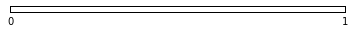

In [126]:
fig = plt.figure(figsize=(6,0.1))
plt.xticks([0.0, 1.0])
plt.yticks([])

Selecting an arbitrary point from the interval, assume every point is equally likely to be selected.

What is the "probability" that we get the blue point (x=0.63) below?

([], <a list of 0 Text yticklabel objects>)

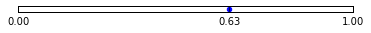

In [127]:
fig = plt.figure(figsize=(6,0.1))
plt.scatter(0.63, 0, c='blue', color='blue')
plt.xticks([0.0,0.63, 1.0])
plt.yticks([])

Let's consider the process below:

Cut the interval half. 

- The probability of obtaining a point from each interval should be 50%.

Since the blue point is contained in one of the intervals, the probability of it should be less than 50%.

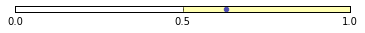

In [128]:
fig = plt.figure(figsize=(6,0.1))
plt.scatter(0.63, 0.05, c='blue', color='blue')
plt.xlim(0,1)
plt.ylim(0, 0.1)
plt.xticks([0.0,0.5, 1.0])
plt.yticks([])
plt.fill([0.5,1.0,1.0,0.5],[0,0,1,1], color= 'yellow', alpha=0.3)

Cut the interval into four pieces. 

- The probability of obtaining a point from each interval should be 25%.

Since the blue point is contained in one of the intervals, the probability of obtaining it should be less than 25%.

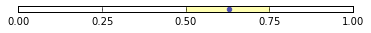

In [129]:
fig = plt.figure(figsize=(6,0.1))
plt.scatter(0.63, 0.05, c='blue', color='blue')
plt.xlim(0,1)
plt.ylim(0, 0.1)
plt.xticks([0.0,0.25,0.5,0.75,1.0])
plt.yticks([])
plt.fill([0.5,0.75,0.75,0.5],[0,0,1,1], color= 'yellow', alpha=0.3)

Cut the interval into ten pieces. 

- The probability of obtaining a point from each interval should be 10%.

Since the blue point is contained in one of the intervals, the probability of obtaining it should be less than 10%.

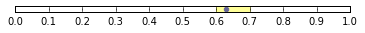

In [130]:
fig = plt.figure(figsize=(6,0.1))
plt.scatter(0.63, 0.05, c='blue', color='blue')
plt.xlim(0,1)
plt.ylim(0, 0.1)
plt.xticks(map(lambda x: 0.1*x, range(11)))
plt.yticks([])
plt.fill([0.6,0.7,0.7,0.6],[0,0,1,1], color= 'yellow', alpha=0.4)

Continue this process, it's easy to see that the probability of obtaining the blue point is **zero**.

In fact, the probability of obtaining any point in the interval is **zero**.

Therefore, for a continuous distribution we talk about the probability of **getting a number from a particular interval**, instead of getting a particular number. Below we demonstrate how this is done with **normal** distribution.

**The Probability Density Function**

The most common way to represent a normal distribution is by its probability density function (**pdf**). We will justify the name "density".

The pdf of a normal distribution if often denoted by:
<br/><br/>
$$
N(\mu, \sigma)(x) = \frac{1}{\sqrt{2\pi}\sigma}exp\big[{-\frac{1}{2}\big(\frac{x-\mu}{\sigma}\big)^2}\big]
$$
<br/>
where $\mu$ is the mean and $\sigma$ is the standard deviation.

Plot the pdf we obtain the famous bell curve:

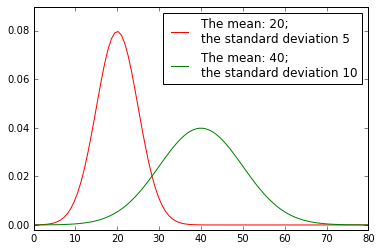

In [131]:
#### Don't worry about the code here; we will discuss later

mu_0 = 20
mu_1 = 40
std_0= 5
std_1= 10
point = np.linspace(0,80,100)

legend_0 = 'The mean: %d;\nthe standard deviation %d' % (mu_0, std_0)
plt.plot(point, stats.norm(mu_0, std_0).pdf(point), color= 'red', label=legend_0)

legend_1 = 'The mean: %d;\nthe standard deviation %d' % (mu_1, std_1)
plt.plot(point, stats.norm(mu_1, std_1).pdf(point), color= 'green', label=legend_1)


plt.xlim(0,80)
plt.ylim(-0.002, 0.09)
plt.legend()

The normal distribution is completely determined by its mean and the standard deviation.

The normal distribution with $\mu=0$ and $\sigma=1$ is called the **standatd normal distribution**. 

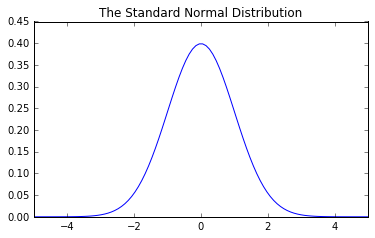

In [132]:
fig = plt.figure(figsize=(6,3.5))
point = np.linspace(-5,5,100)
plt.plot(point, stats.norm(0, 1).pdf(point))
plt.title('The Standard Normal Distribution')
plt.ylim(0, 0.45)
plt.xlim(-5, 5)
print 

**The Cumulative Density Function**

The probability density is important of its own right, but probability can be more intuitive.

For an interval, the probability of the occurrence of any number in it is **the area above the interval interval and beneath the pdf curve**. 

The probability of obtaining a number smaller than -1 is the area below:

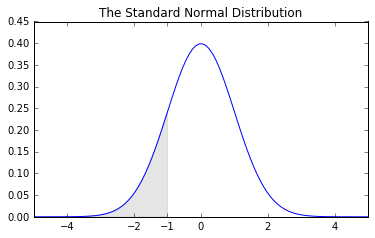

In [133]:
fig = plt.figure(figsize=(6,3.5))
point = np.linspace(-5,5,100)
plt.plot(point, stats.norm(0, 1).pdf(point))
plt.title('The Standard Normal Distribution')
point = np.linspace(-5,-1,100)

plt.fill([-5]+list(point)+[-1], [0]+map(stats.norm(0, 1).pdf, point)+[0], color='grey', alpha=0.2)
plt.ylim(0, 0.45)
plt.xlim(-5, 5)
plt.xticks([-4,-2,-1,0,2,4])
print 

Equivalently, this can be represented by integral:

$$
\int_{-\infty}^{-1} N(0, 1)(t) dt
$$

The probability of obtaining a number smaller than 0 is the area below:

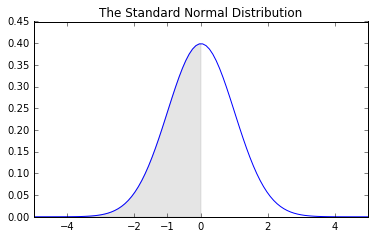

In [134]:
fig = plt.figure(figsize=(6,3.5))
point = np.linspace(-5,5,100)
plt.plot(point, stats.norm(0, 1).pdf(point))
plt.title('The Standard Normal Distribution')
point = np.linspace(-5,0,100)

plt.fill([-5]+list(point)+[0], [0]+map(stats.norm(0, 1).pdf, point)+[0], color='grey', alpha=0.2)
plt.ylim(0, 0.45)
plt.xlim(-5, 5)
plt.xticks([-4,-2,-1,0,2,4])
print

or with integral:

$$
\int_{-\infty}^{0} N(0, 1)(t) dt
$$

Therefore, the **cumulative density function** is defined:

$$
\text{cdf}(x) = \int_{-\infty}^{x} N(0, 1)(t) dt
$$

Once we understand the cdf function, then the probability of obtaining a value from an arbitrary interval [a, b] is:

$$
\text{cdf}(b) - \text{cdf}(a) = \int_a^b N(0, 1)(t) dt
$$

or can be visualized by:

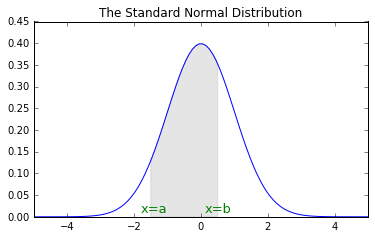

In [135]:
fig = plt.figure(figsize=(6,3.5))
point = np.linspace(-5,5,100)
plt.plot(point, stats.norm(0, 1).pdf(point))
plt.title('The Standard Normal Distribution')
point = np.linspace(-1.5,0.5,100)

plt.fill([-1.5]+list(point)+[0.5], [0]+map(stats.norm(0, 1).pdf, point)+[0], color='grey', alpha=0.2)
plt.ylim(0, 0.45)
plt.xlim(-5, 5)
plt.xticks([-4,-2,0,2,4])
color='green'
plt.text(x=-1.8, y=0.01, s='x=a', fontsize=13, color=color)
plt.text(x=0.1, y=0.01, s='x=b', fontsize=13, color= color)
print

To summarise, the normal distribution (as a continuous distribution) are often characterized by

- the cumulative density function, which assigns a probability to each interval.
- the probability density function, the area under whose curve assigns a probability to the corresponding interval. More precisely, pdf is actually the derivative of cdf. And since cdf returns probability, pdf returns the probability density.

**Remark** Even though the probability density is not probability, it does indicate **likelihood**. That is to say, the values with higher probability density are more likely to occur. In fact, in many machine learning algorithm, the likelihood functions are constructed from pdf.

<p><a name="norm_object"></a></p>
**The Normal Distribution Object**

Again, everything is an object in Python.

To deal with the normal distribution, let's create a normal distribution object:

In [136]:
my_norm = stats.norm(3, 1)

Above we specify that the distribution has:
- the mean = 3
- the standard deviation = 1

Some of the well-known fact can be tested:

In [137]:
print 'probability smaller than mean: %f' % my_norm.cdf(3)
print 'probability staying within 1 sd: %.4f' % (my_norm.cdf(3+1) - my_norm.cdf(3-1))
print 'probability staying within 2 sd: %.4f' % (my_norm.cdf(3+2) - my_norm.cdf(3-2))
print 'probability staying within 3 sd: %.4f' % (my_norm.cdf(3+3) - my_norm.cdf(3-3))

probability smaller than mean: 0.500000
probability staying within 1 sd: 0.6827
probability staying within 2 sd: 0.9545
probability staying within 3 sd: 0.9973


Also, the pdf does have a well-know bell shape, which is symmetric and centered at the mean:

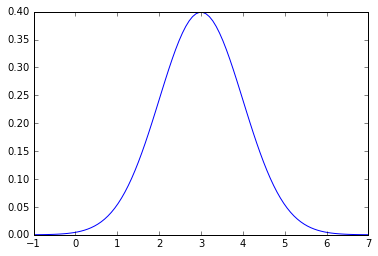

In [138]:
point = np.linspace(-1,7,100)
plt.plot(point, my_norm.pdf(point))

**Random Sampling with a Normal Distribution**

We can again random generate 10,000 samples with our `my_norm` object.

In [139]:
size = 10000
np.random.seed(1)
sample = my_norm.rvs(size)

To confirm that `sample` obeys the normal distribution, there are a few tests can be done, first of all:

In [140]:
print 'The sample mean of the sample is %.4f' % np.mean(sample)
print 'The sample standard deviation of the sample is %.4f' % np.std(sample)

The sample mean of the sample is 3.0098
The sample standard deviation of the sample is 0.9988


To be more precise, how do visualize the distribution of a numerical feature?

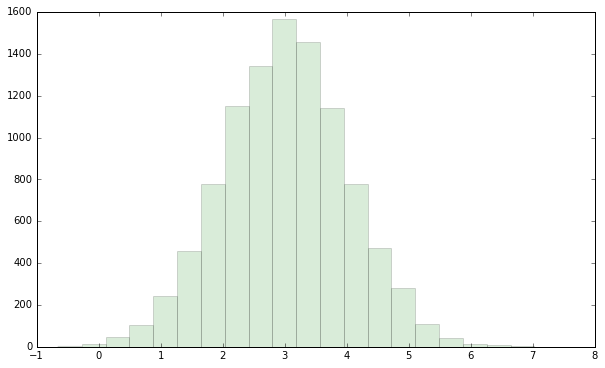

In [141]:
plt.figure(figsize=(10,6))
plt.hist(sample, color='green', bins=20, alpha=0.15)
print

How do we compare this empirical distribution with our `my_norm`? 

- Since the histogram looks pretty "bell shape", why don't we sketch the pdf curve in the same graph?

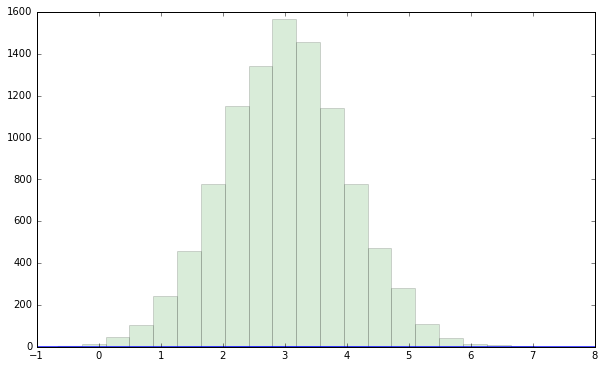

In [142]:
plt.figure(figsize=(10,6))
plt.hist(sample, color='green', bins=20, alpha=0.15)
point = np.linspace(-1, 8, 100)
plt.plot(point, my_norm.pdf(point))

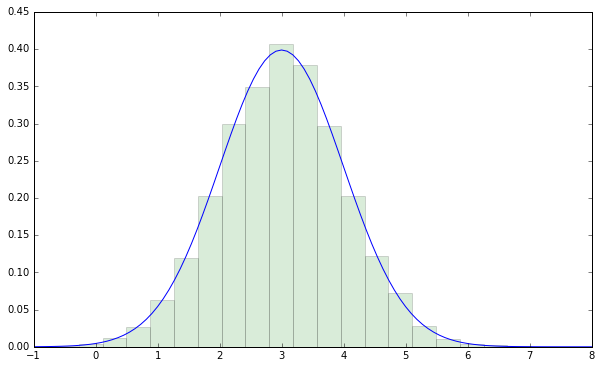

In [143]:
plt.figure(figsize=(10,6))
plt.hist(sample, color='green', bins=20, normed=True, alpha=0.15)
point = np.linspace(-1, 8, 100)
plt.plot(point, my_norm.pdf(point))

**Remark** Generating samples with a distribution in had is called sampling; Searching for the distribution most likely to generate the samples collected is called **modeling**.